## Исследование объявлений о продаже квартир

В данном проекте будут ислледованы данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Мы научимся определять рыночную стоимость объектов недвижимости, а также установим параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Краткое содержание проекта:
- Изучение общей информации о файле с данными.
- Изучение каждого столбца и поиск потенциальных ошибок.
- Работа над ошибками файла. Заполнение пропусков и исправление ошибок.
- Изменение типов данных.
- Исследовательский анализ данных
- Выводы и поиск ответов на основные вопросы, поставленные в проекте.

Автор проекта: 
- Виктория Кускова, 
- студентка Яндекс.Практикума, кагорты DS20.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
#импорты библиотек и ключевые константы для проекта
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#импорт файла с данными
data = pd.read_csv('/datasets/real_estate_data.csv')

Далее начнём изучение содержимого файла.

In [3]:
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Очевидно произошла проблема "склеивание" строк. Попробуем ее решить: перевыгрузим файл корректно.

In [4]:
#импорт файла с данными
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проблема склеивания столбцов ушла. Вернемся к изучению массива данных.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


При первом изучении всех данных видно, что с следующих столбцах есть пропущенные значения:
- ceiling_height (9195 пропущенных значений);
- floors_total (86 пропущенных значений);
- living_area (1903 пропущенных значений);
- is_apartment (только около 3 тыс есть, но скорее всего это просто особенность столбца с булевыми значениями, проверим позже);
- kitchen_area (2278 пропущенных значений);
- balcony (11519 пропущенных значений);
- locality_name (49 пропущенных значений);
- airports_nearest (5542 пропущенных значений);
- cityCenters_nearest (5519 пропущенных значений);
- parks_around3000 (5518 пропущенных значений);
- parks_nearest (15620 пропущенных значений);
- ponds_around3000 (5518 пропущенных значений);
- ponds_nearest (14589 пропущенных значений);
- days_exposition (3181 пропущенных значений)

Получилось много столбцов с пропусками, требующие изучения. Но также нужно проверить и столбцы без пропусков на предметы ошибок. Из общей информации по всех столбцам бросается в глаза, что минимальные значения везде 0 или больше, отрицательных нет. Это хорошо, скорее всего ошибок со случайно затерявшимся знаком "тире-минусом" тут нет. Поищем другие, анализируя отдельно каждый столбец. 

А также отсутсвие отрицательных значений для многих столбцов значит, что значения ограничены с одной стороны 0. Поэтому скорее всего распределение значений по нашим столбцам должно быть близко к распреденению Пуассона. Но могут быть и исключения, увидим это, изучая каждый столбец.

#### Столбец 'total_images'

Данный столбец предполагает целочисленные значения (число фотографий квартиры в объявлении). Как мы выяснили выше, у него нет пропусков.

In [8]:
#анализ столбца 'total_images'
data['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50])

Кажется больших выбросов и неправдоподобных значений нет. Но давайте посмотрим на то как много строк по каждому из значений, как распределены эти значния. Методы value_counts() или groupby()+count() будут не так информативны (слишком много значений). Попробуем постоить простую гистограмму.

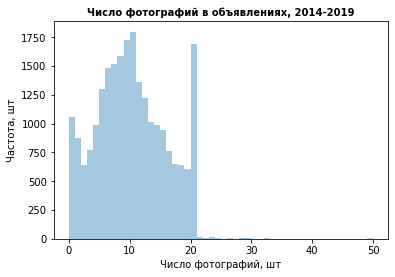

In [9]:
#построение графика через беблиотеки seaborn и matplotlib.pyplot
plt.title("Число фотографий в объявлениях, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['total_images'], kde=False, rug=False, axlabel="Число фотографий, шт")

Основной пик гистограммы - около 10-12, это примерное оптимальное число фото для объявления. Но видим еще несколько пиков в районе 0, и 20. А после 20 резкое падение. Вероятно это связано с техническими ограничениями на многих устройствах, которые не дают подгрузить за 1 раз больше 20 фотографий. Вероятно, что без этого ограничения этот пик распределился бы более равномерно по остальному хвосту. С Пиокм в 0 тоже все ясно, иногда фото нет при размещении объявлений (продавец живет в др. месте и не может физически сделать фото на момент публикации).

Без данных пиков, это на диаграмму Пуассона. Это хорошо, так как это целочисленные значения, ограниченные с одной стороны 0. Очень правдободобно. Посмотрим на следующий столбец.

#### Столбец 'last_price'

Цена на момент снятия с публикации.
Ключевой столбец для построения нашей бущей модели. Пропусков у него замечено не было. 

In [10]:
#анализ столбца 'last_price'
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимум - это десятки тысяч, максимум около 800 млн. Разброс огромный.

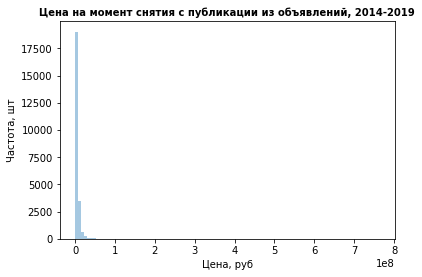

In [11]:
#график для 'last_price'
plt.title("Цена на момент снятия с публикации из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['last_price'], bins=100, kde=False, rug=False, axlabel="Цена, руб")

Видно, что большиснво квартир стоило меньше 100 млн (или скорее всего даже ниже), и есть длинный хвост. Очевидно, что некоторые чересчур высокие значения очень редкие и могут исказить нам карнину. Также и отклонение досточно высокое у значений.

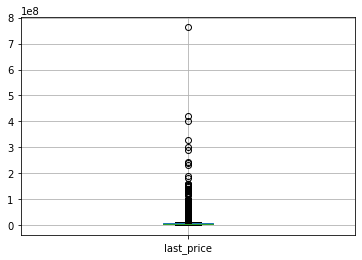

In [12]:
data.boxplot(column='last_price')

Усы даже сложно отлисчимы на графике. Также мы видим, что есть одно аномально большое значение, и несколько также очень больших (но которые в 2 раза меньше самого большого).

In [13]:
data.sort_values(by='last_price', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.5,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0


Скорее всего такие выбрасы только будут скажать нашу модель. Вероятно нам нужно будет их не учитывать при анализе, но посмотрим на них внимательнее. Возможно это класс очень дорогих квартир, который, отбросив, мы ухудшим нашу модель.

Для первого знакомства с "ключевым столбцом" достаточно. Вернемся к нему при дальнейшей работе с задачей.

#### Столбец 'total_area'

Площадь квартиры в квадратных метрах (м²). Пропусков нет.


In [14]:
#анализ столбца 'total_area'
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

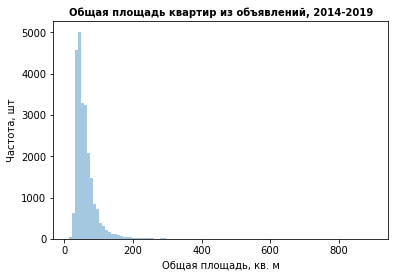

In [15]:
#график для 'total_area'
plt.title("Общая площадь квартир из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['total_area'], bins=100, kde=False, rug=False, axlabel="Общая площадь, кв. м")

Очень хорошо, что нет значений 0, никто не забыл проставить площадь. А также заметно, что гистограма похожа на гистограмму по ценам. Вероятно хвост с большой площадью и большой ценой - это один и тот же хвост. Тогда его точно не нужно удалять.

In [16]:
data.sort_values(by='total_area', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.9,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0


Целых 2 строки в хвосте совпадают! И это мы сравнили всего по 5 максимальных значений. Кажется вырисовывается отдельный срез класс элитных квартир. Запомним это, и пойдем изучать следующий столбец.

#### Столбец 'first_day_exposition'

Дата публикации. Пропусков нет, столбец не численный. Посмотрим глазами на его значения.

In [17]:
#анализ столбца 'first_day_exposition'
data['first_day_exposition'].sort_values().unique()

array(['2014-11-27T00:00:00', '2014-11-29T00:00:00',
       '2014-12-04T00:00:00', ..., '2019-05-01T00:00:00',
       '2019-05-02T00:00:00', '2019-05-03T00:00:00'], dtype=object)

Видим данные за 5 лет. Все они обозначают дату. По этому столбцу необходимо будет изменить тип данных.

#### Столбец 'rooms'

Число комнат, пропусков нет.

In [18]:
#анализ столбца 'rooms'
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [19]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

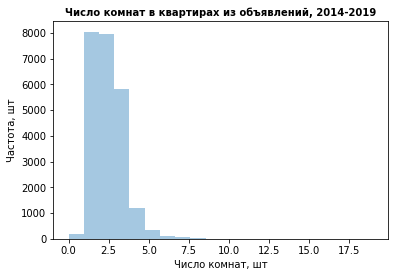

In [20]:
#график для 'rooms'
plt.title("Число комнат в квартирах из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['rooms'], bins=20, kde=False, rug=False, axlabel="Число комнат, шт")

Больше 10 квартир - это уже очень редкая история. Да и 5 встречается уже не так часто. Также есть квартиры с 0 комнат. Это явная ошибка. 

In [21]:
data[data['rooms'] == 0]['rooms'].value_counts()

0    197
Name: rooms, dtype: int64

197 квартир без обозначения числа комнат. Посмотрим на примеры таких строк.

In [22]:
data[data['rooms'] == 0].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.00,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.00,7,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0


По такой маленькой выборке можно сделать предположение, что пропуски не случайны. Площадь квартиры достаточно не большая. Возможно 0 проставляли там, где всего 1 комната. Сравним показатели таких квартир и квартир с 1 комнатой. 

In [23]:
data[data['rooms'] == 0].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,197.000000,1.970000e+02,197.000000,197.0,82.000000,194.000000,183.000000,197.000000,0.0,126.000000,118.000000,118.000000,118.000000,29.000000,118.000000,69.000000,183.000000
mean,7.776650,3.337724e+06,29.279746,0.0,3.104268,16.896907,18.865246,8.578680,NaN,1.579365,24516.432203,13388.610169,0.296610,594.862069,0.822034,526.043478,109.180328
std,5.079055,5.046022e+06,25.855264,0.0,2.698948,6.925936,6.549527,6.290595,NaN,0.661552,12386.969865,5028.479861,0.559446,302.820164,0.873458,274.811509,158.847377
min,0.000000,9.457500e+05,15.500000,0.0,2.500000,3.000000,2.000000,1.000000,NaN,0.000000,6989.000000,1261.000000,0.000000,38.000000,0.000000,72.000000,3.000000
25%,4.000000,2.300000e+06,24.050000,0.0,2.700000,12.000000,16.000000,3.000000,NaN,1.000000,14567.000000,11618.000000,0.000000,396.000000,0.000000,348.000000,27.500000
50%,7.000000,2.700000e+06,26.050000,0.0,2.750000,17.000000,18.000000,7.000000,NaN,2.000000,21460.000000,13595.500000,0.000000,535.000000,1.000000,528.000000,50.000000
75%,11.000000,3.380000e+06,28.400000,0.0,2.800000,23.000000,19.950000,13.000000,NaN,2.000000,34004.750000,16383.750000,0.000000,761.000000,1.000000,674.000000,117.500000
max,21.000000,7.100000e+07,371.000000,0.0,27.000000,35.000000,68.000000,26.000000,NaN,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000


In [24]:
data[data['rooms'] == 1].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,8047.000000,8.047000e+03,8047.000000,8047.0,4613.000000,8015.000000,7388.000000,8047.000000,7213.000000,4228.000000,5883.000000,5888.00000,5888.000000,2278.000000,5888.000000,2848.000000,7273.000000
mean,9.135578,3.835362e+06,37.644669,1.0,2.716267,12.639301,17.893552,6.932770,9.550118,1.096263,29765.009859,15658.45873,0.507303,506.917032,0.696501,532.682935,158.909391
std,5.323550,1.899944e+06,9.338358,0.0,1.640600,7.013679,3.448422,5.448818,3.311955,0.873583,13433.472382,7986.94307,0.734235,366.507462,0.866162,280.473182,198.636191
min,0.000000,4.300000e+05,12.000000,1.0,1.750000,1.000000,3.000000,1.000000,1.300000,0.000000,0.000000,208.00000,0.000000,4.000000,0.000000,19.000000,2.000000
25%,5.000000,2.900000e+06,32.500000,1.0,2.500000,6.000000,16.000000,3.000000,7.200000,0.000000,17924.500000,11486.75000,0.000000,287.250000,0.000000,315.000000,39.000000
50%,9.000000,3.600000e+06,36.560000,1.0,2.640000,11.000000,17.600000,5.000000,9.040000,1.000000,29305.000000,14265.00000,0.000000,455.000000,0.000000,511.000000,81.000000
75%,13.000000,4.450000e+06,41.000000,1.0,2.750000,17.000000,19.000000,10.000000,11.000000,2.000000,39622.000000,17172.00000,1.000000,629.000000,1.000000,749.000000,199.000000
max,30.000000,4.351100e+07,494.100000,1.0,100.000000,52.000000,60.000000,31.000000,58.400000,5.000000,78527.000000,60223.00000,3.000000,3190.000000,3.000000,1344.000000,1512.000000


Такие показатели, как living_area, price очень похожи по средним и максимальным/показателям. Также как и чсило фотографий (что тоже связано с числом комнат, на которых обычно стараются показать все комнаты и их ракурсы).

Заменим 0 в rooms на 1. Также далее изучим строки с максимальными значениями.

In [25]:
data.sort_values(by='rooms', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3.00,4.0,180.0,4,NaN,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
20829,6,28659000.0,245.4,2016-03-31T00:00:00,14,NaN,4.0,168.3,2,NaN,...,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0


Для таких квартир видим, что и площадь общая и жилая большая. Не похоже на ошибку.

Зато кажется не все владельцы больших квартир наоборот любят высталять много фото. Интересная возможная закономерность.

#### Столбец 'ceiling_height'

Высота потолков (м), 9195 пропущенных значений. Вероятно они были пропущены, так как не каждый знает свою высоту потолка (в отличии от чила комнат). Также высота часто очень стандартная, и ее стоит указать только если она отличается от стандартной.

Проверим как срез с пропущенными значениями отличается от остальных и если ннет существенных отличий, то заменим высоты потолков на среднее или медиану.

In [26]:
#анализ столбца 'rooms'
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [27]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

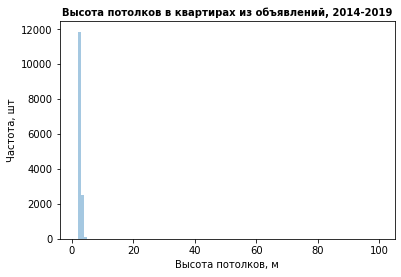

In [28]:
#график для 'ceiling_height'
plt.title("Высота потолков в квартирах из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['ceiling_height'], bins=100, kde=False, rug=False, axlabel="Высота потолков, м")

100 - аномально большое значение, для высоты потолка. Явная ошибка.

Мы видим, что и значения больше 4 очень редки. Современные рекомендации - не делать высоту потолка больше около 3,2 метров, так как это затрудняет обслуживание. Скорее всего исключения есть - двухэтажные квартиры, старые особняки. Посмотрим на этот срез внимательнее. Но для расчета медианы или среднего такие значения лучше исключить.

Также квартиры обычно выше 2,5 метров, так как люди обычно должны там помещаться в стоячем положении и это современный стандарт. Меньше 2,5 метров - это исключения: старые дома или случаи, когда из-за ремонта и дополнительных контрукций высота в квартире уменьшилас. Поэтому для построения среднего и медианы возьмем значения только больше 2,2 метров. А на остальные посмотрим внимательнее.

In [29]:
data.query('ceiling_height == 100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


100 метров для высоты потолков и 5 балконов для однокомнатной квартиры выглядят неправдоподобно. Кто-то явно спешил с заполнением данных по квартире, или скрипт, который собирал объявления со сторонних ресерсов отработал некорректно. Заменим высоту потолка для данной строки также как и для пропусков.

In [30]:
data.query('ceiling_height >= 4 and ceiling_height != 100').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06T00:00:00,3,4.15,3.0,44.2,2,NaN,...,12.2,NaN,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
179,5,14800000.0,108.7,2019-04-11T00:00:00,3,4.00,5.0,72.4,5,NaN,...,8.0,NaN,Санкт-Петербург,23017.0,2559.0,1.0,559.0,0.0,NaN,NaN
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN


Значения близкие к 4-6 метрам могут действительно быть исключениями: нестандартными постройками. На примере выше видно, что у них довольно большая площадь. А вот значения больше 10 явная ошибка.

In [31]:
data.query('ceiling_height >= 10 and ceiling_height != 100').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,24.00000,2.400000e+01,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,19.000000,17.000000,15.000000,15.000000,15.000000,7.00000,15.000000,7.000000,18.000000
mean,10.12500,4.497875e+06,54.408333,1.916667,24.97500,9.833333,33.187500,5.875000,9.142105,2.176471,27540.933333,14035.133333,0.666667,532.00000,1.000000,353.142857,150.444444
std,7.19488,2.051578e+06,19.785127,0.880547,4.69081,8.519373,14.005568,5.550656,2.822787,1.286239,15163.703621,11070.519519,0.899735,222.33908,1.253566,203.153004,156.935814
min,0.00000,1.700000e+06,25.000000,0.000000,10.30000,2.000000,15.500000,1.000000,5.200000,1.000000,11647.000000,3246.000000,0.000000,305.00000,0.000000,73.000000,7.000000
25%,4.75000,3.225000e+06,42.750000,1.000000,25.00000,5.000000,21.825000,2.000000,7.500000,1.000000,17513.500000,9074.500000,0.000000,407.00000,0.000000,205.500000,30.500000
50%,10.00000,3.925000e+06,47.500000,2.000000,25.50000,5.000000,30.700000,3.000000,9.000000,2.000000,27028.000000,12570.000000,0.000000,440.00000,0.000000,449.000000,72.000000
75%,17.00000,5.375000e+06,58.500000,2.000000,27.00000,14.000000,37.775000,6.500000,10.500000,2.000000,33019.500000,14351.000000,1.000000,599.00000,2.000000,480.500000,245.750000
max,20.00000,9.999000e+06,98.000000,4.000000,32.00000,36.000000,73.000000,19.000000,16.500000,5.000000,68923.000000,50649.000000,3.000000,967.00000,3.000000,578.000000,540.000000


Видим, что таких значений мало. И показатели по жилой площади и числу комнат небольшие. Заменим эти значения на усредненные показатели как для пропусков.

In [32]:
data[data['ceiling_height'] < 2.1].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,14.000000,1.400000e+01,14.000000,14.000000,14.000000,14.000000,12.000000,14.000000,12.000000,4.000000,5.000000,5.000000,5.00000,3.000000,5.000000,4.000000,11.000000
mean,7.071429,3.440643e+06,46.366429,1.714286,1.853571,10.642857,27.541667,5.357143,8.395000,1.000000,29888.000000,16212.400000,0.80000,460.333333,1.400000,368.000000,107.818182
std,4.968583,2.830583e+06,15.381395,0.825420,0.328437,9.295219,15.386857,3.410552,2.408759,0.816497,7829.539354,7593.832978,0.83666,146.888847,1.140175,396.880335,105.487268
min,0.000000,1.500000e+06,33.000000,1.000000,1.000000,2.000000,15.000000,1.000000,5.200000,0.000000,18732.000000,7675.000000,0.00000,293.000000,0.000000,80.000000,6.000000
25%,4.250000,1.805000e+06,35.625000,1.000000,2.000000,5.000000,17.200000,2.500000,6.000000,0.750000,25268.000000,11746.000000,0.00000,406.500000,1.000000,135.500000,40.500000
50%,5.500000,2.550000e+06,40.000000,1.500000,2.000000,7.000000,19.500000,5.000000,8.570000,1.000000,33053.000000,14217.000000,1.00000,520.000000,1.000000,221.500000,62.000000
75%,9.000000,3.525000e+06,54.650000,2.000000,2.000000,14.250000,34.300000,7.750000,10.025000,1.250000,33972.000000,20444.000000,1.00000,544.000000,2.000000,454.000000,174.000000
max,17.000000,1.230000e+07,88.300000,3.000000,2.000000,37.000000,63.900000,12.000000,12.000000,2.000000,38415.000000,26980.000000,2.00000,568.000000,3.000000,949.000000,282.000000


Всего 14 строк. Вероятнее всего значение 2 метра писалось, так как не знали точного значения. Но это не совсем верно, так такой высоты практически не существует. Ну а меньше 2 - это ошибки, посмотрим на них. 

In [33]:
data[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Да, эти значения явно ошибочные. Заменим их и значение 2.0 на усредненное.

А теперь изучим пропущенные значения. Сравним показатели по ним и по срезу с высотой потолком от 2.1 до 4 метров.

In [34]:
data[data['ceiling_height'].isnull()].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,9195.000000,9.195000e+03,9195.000000,9195.000000,0.0,9118.000000,8089.000000,9195.000000,7857.000000,4923.000000,6617.000000,6620.000000,6620.000000,2785.000000,6620.000000,3378.000000,8467.000000
mean,9.128657,6.077565e+06,57.915896,1.965416,NaN,11.469950,32.387505,6.314410,10.572227,0.841966,28748.811395,14410.901964,0.563746,517.501616,0.761631,517.299586,167.312153
std,5.684539,1.190045e+07,33.298951,1.036479,NaN,7.108749,20.397340,5.251454,5.641956,0.998480,12641.298030,8336.124372,0.766036,379.899487,0.915022,273.596955,205.544186
min,0.000000,4.300000e+05,13.000000,0.000000,NaN,1.000000,2.000000,1.000000,2.000000,0.000000,6450.000000,318.000000,0.000000,1.000000,0.000000,13.000000,2.000000
25%,5.000000,3.200000e+06,38.800000,1.000000,NaN,5.000000,18.000000,2.000000,7.200000,0.000000,18641.000000,9509.500000,0.000000,293.000000,0.000000,303.000000,44.000000
50%,9.000000,4.300000e+06,50.000000,2.000000,NaN,9.000000,29.000000,5.000000,9.400000,1.000000,26709.000000,13322.000000,0.000000,460.000000,1.000000,500.000000,89.000000
75%,13.000000,6.300000e+06,66.300000,3.000000,NaN,16.000000,40.000000,9.000000,12.000000,2.000000,37434.000000,16865.000000,1.000000,637.000000,1.000000,722.000000,210.000000
max,50.000000,7.630000e+08,631.000000,19.000000,NaN,36.000000,332.000000,33.000000,107.000000,5.000000,78527.000000,60223.000000,3.000000,3190.000000,3.000000,1341.000000,1572.000000


In [35]:
data.query('ceiling_height >= 2.1 and ceiling_height < 4').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,14376.00000,1.437600e+04,14376.000000,14376.000000,14376.000000,14367.000000,13589.000000,14376.000000,13453.000000,7199.000000,11442.000000,11459.000000,11460.000000,5228.000000,11460.000000,5661.000000,11953.000000
mean,10.31177,6.725128e+06,61.492431,2.132095,2.718084,10.202060,35.415198,5.634669,10.526827,1.360050,28838.959273,14116.878960,0.634642,477.054132,0.769983,519.100866,189.869907
std,5.61416,9.812245e+06,35.804371,1.092780,0.249035,6.197739,22.058902,4.623714,5.957804,1.067384,12645.902228,8738.464521,0.817453,320.862254,0.947789,280.385700,228.227329
min,0.00000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,3.000000,0.000000,16.000000,1.000000
25%,6.00000,3.550000e+06,41.000000,1.000000,2.510000,5.000000,19.100000,2.000000,7.000000,1.000000,18503.000000,9165.500000,0.000000,285.000000,0.000000,288.000000,45.000000
50%,10.00000,4.850000e+06,53.100000,2.000000,2.650000,9.000000,30.700000,4.000000,9.000000,1.000000,26785.500000,12993.000000,0.000000,448.000000,0.000000,504.000000,103.000000
75%,15.00000,7.000000e+06,71.000000,3.000000,2.800000,14.000000,43.100000,7.000000,12.000000,2.000000,37131.000000,16051.500000,1.000000,602.000000,1.000000,733.000000,246.000000
max,35.00000,4.200000e+08,900.000000,16.000000,3.980000,60.000000,409.700000,30.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видим, что средние показатели очень походи по столбцам: total_images (9.1 и 10.3), last_price (6.077565e+06 и 6.725128e+06), total_area (57.9 и 61.4), rooms(1.9 и 2.1). А также отклонения и др. показатели. Поэтому пропуски ведут себя схожим образом с основням срезом данных, они случайны. Поэтому можем их заменить на медиану по срезу 'ceiling_height >= 2.1 and ceiling_height < 4', как и другие ошибки, описанные выше.

#### Столбец 'floors_total'

Всего этажей в доме, 86 пропущенных значений.

In [36]:
#анализ столбца 'floors_total'
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

Больше 40 этажей - это уже редкость для СПБ и окрестностей. Такие жилые комплексы известны, проверим относятся ли наши строки к этим знаменитым домам.

In [37]:
data[data['floors_total'] > 40]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,...,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Первая строка явная ошибка. 60 этажей есть только у одного здания в СПБ и окрестностях, и оно не в Кронштадте. Насчет второй строки ннеизвестно до конца. Но на самомо деле эти строки не так важные для нашей задачи, поэтому не будем их менять. зучим лучше пропуски.

In [38]:
data[data['floors_total'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [39]:
data[data['floors_total'].isnull()].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,86.000000,8.600000e+01,86.000000,86.000000,9.000000,0.0,53.000000,86.000000,39.000000,47.000000,76.000000,76.000000,76.000000,34.000000,76.000000,49.000000,77.000000
mean,5.453488,6.814282e+06,62.537674,1.930233,2.777778,NaN,32.435849,10.023256,13.683590,0.085106,30141.184211,15666.710526,0.605263,549.941176,0.802632,475.714286,181.896104
std,4.010741,5.551092e+06,37.178265,1.082380,0.106393,NaN,19.019650,6.210005,5.768561,0.408059,13720.664002,6999.313903,0.784499,529.757975,0.748683,243.730811,232.229899
min,0.000000,1.640000e+06,23.170000,0.000000,2.650000,NaN,10.000000,1.000000,3.500000,0.000000,7050.000000,3148.000000,0.000000,24.000000,0.000000,130.000000,3.000000
25%,3.000000,3.480000e+06,35.842500,1.000000,2.700000,NaN,17.500000,5.000000,10.665000,0.000000,21570.750000,11303.750000,0.000000,251.000000,0.000000,350.000000,49.000000
50%,5.000000,5.192500e+06,55.950000,2.000000,2.800000,NaN,31.000000,8.000000,12.200000,0.000000,25892.000000,14637.000000,0.000000,400.000000,1.000000,374.000000,111.000000
75%,8.750000,7.523265e+06,76.725000,3.000000,2.800000,NaN,45.380000,13.750000,15.185000,0.000000,40679.000000,17369.000000,1.000000,655.250000,1.000000,652.000000,183.000000
max,19.000000,4.034825e+07,284.000000,6.000000,3.000000,NaN,104.760000,24.000000,40.000000,2.000000,61908.000000,34085.000000,3.000000,2276.000000,3.000000,1158.000000,1257.000000


Сравним с показателями не пропущенных значений.

In [40]:
data.query('floors_total.notnull()').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,14495.000000,23613.000000,21743.000000,23613.000000,21382.000000,12133.000000,18081.000000,18104.000000,18105.000000,8045.000000,18105.000000,9061.000000,20441.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.771495,10.673824,34.462781,5.877313,10.564128,1.154208,28788.008185,14185.084015,0.611433,490.554630,0.770119,518.209469,180.884839
std,5.681541,1.090172e+07,35.648988,1.078380,1.261445,6.597173,22.037433,4.873539,5.904316,1.071022,12626.209956,8614.132292,0.802168,341.336698,0.939075,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13093.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Сильные отличия от прошлых срезов (которые делали для анализа прошлого столбца, там было в среднем около 1,1 балконов) по чисту балконов - у всех этих пропусков число балконов почти 0. Также среднее по связанному столбцу floors расходятся: 10 и 5 этажей.

Эти пропуски не выглядят случайными. Не будем их аполнять. Также их не очень много, всего 86.

#### Столбец 'living_area'

Жилая площадь в квадратных метрах(м²), 1903 пропущенных значений. Вероятно они были пропущены, так как многие не понимают как правильно вычислить жилую площадь для своей квартиры. Не все помнят, что входит в это определение.

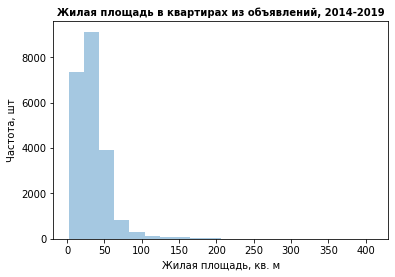

In [41]:
#анализ столбца 'living_area'
#график для 'living_area'
plt.title("Жилая площадь в квартирах из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['living_area'], bins=20, kde=False, rug=False, axlabel="Жилая площадь, кв. м")

Распределение выглядит хорошо. Похоже на распределение Пуассона, также как и по столбцу total_area.

Посмотрим на пропуски. Если мы будем их заполнять, нужно учесть, что жидая площадь зависит от общей площади. Также посмотрим на возможные ошибки. Проверим нет ли случаев, когда жилая площадь больше общей.

In [42]:
data.query('living_area > total_area')['living_area'].count()

0

Отлично! Теперь посмотрим на данные по пропускам и без.

In [43]:
data.query('living_area.isnull()').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,1903.000000,1.903000e+03,1903.000000,1903.000000,797.000000,1870.000000,0.0,1903.000000,439.000000,498.000000,1278.000000,1280.000000,1280.000000,577.000000,1280.000000,695.000000,1705.000000
mean,8.034157,6.999936e+06,63.319795,2.055702,2.741267,10.985561,NaN,5.918024,13.094328,1.174699,29150.431142,13602.303125,0.628125,528.928943,0.839063,504.290647,136.646334
std,5.426247,1.110884e+07,45.070218,1.056276,0.317237,6.903082,NaN,5.071477,7.960103,1.215097,12366.092851,7799.705946,0.820471,395.707568,0.958419,285.797749,197.207785
min,0.000000,4.300000e+05,13.000000,0.000000,2.000000,1.000000,NaN,1.000000,4.000000,0.000000,7019.000000,318.000000,0.000000,9.000000,0.000000,16.000000,2.000000
25%,4.000000,3.070000e+06,41.000000,1.000000,2.500000,5.000000,NaN,2.000000,8.700000,0.000000,19339.000000,8370.000000,0.000000,302.000000,0.000000,246.500000,45.000000
50%,7.000000,4.500000e+06,53.000000,2.000000,2.650000,9.000000,NaN,4.000000,10.940000,1.000000,27116.000000,12962.500000,0.000000,470.000000,1.000000,493.000000,60.000000
75%,11.000000,7.000000e+06,71.000000,3.000000,2.800000,16.000000,NaN,8.000000,14.220000,2.000000,37434.000000,16554.500000,1.000000,649.000000,1.000000,723.000000,133.000000
max,20.000000,2.300000e+08,631.000000,9.000000,5.600000,35.000000,NaN,27.000000,60.000000,5.000000,69059.000000,52895.000000,3.000000,2489.000000,3.000000,1293.000000,1489.000000


In [44]:
data.query('living_area.notnull()').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21796.000000,2.179600e+04,21796.000000,21796.000000,13707.000000,21743.000000,21796.000000,21796.000000,20982.000000,11682.000000,16879.000000,16900.000000,16901.000000,7502.000000,16901.000000,8415.000000,18813.000000
mean,10.017756,6.501527e+06,60.089242,2.071940,2.773257,10.647013,34.457852,5.890117,10.516987,1.149033,28766.660051,14235.886568,0.610141,487.872301,0.765043,519.111586,184.898262
std,5.676716,1.086677e+07,34.700155,1.080329,1.294926,6.569673,22.030445,4.868766,5.843371,1.064785,12650.652958,8665.142199,0.800674,337.714510,0.936631,277.030214,221.223815
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18539.000000,9289.000000,0.000000,287.000000,0.000000,297.000000,44.000000
50%,10.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,1.000000,26662.000000,13107.000000,0.000000,451.000000,0.000000,503.000000,101.000000
75%,14.000000,6.750000e+06,69.600000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37227.000000,16272.000000,1.000000,610.000000,1.000000,730.000000,239.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Данные по почти всем столбам лчень похожи. Вот примеры средних из таблицы с пропусками и нет: total_images (8 и 10), last_price (6.999936e+06 и 6.501527e+06), total_area (63 и 60), rooms (2.05 и 2.07), Floors_total (10.9 и 10.6), floor (5.9 и 5.8), kitchen_area (13 и 10.5), balcony (1.17 и 1.14).

Ура! Пропуски выглядят случайными. Теперь поймем как их заполнить. Вычислим коэффициент зависимости жилой площали от общей для строк без пропусков и сохраним это в переменной total_area_to_living_area

In [45]:
total_area_to_living_area = (
    data.query('living_area.notnull()')['living_area']/data.query('living_area.notnull()')['total_area']
).mean()

total_area_to_living_area

0.5647655216993234

Далее заполним пропуски, используя коэффициент выше.

#### Столбец 'floor'

Этаж, пропусков нет. Посмотрим на уникальные значения.

In [46]:
#анализ столбца 'floor'
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

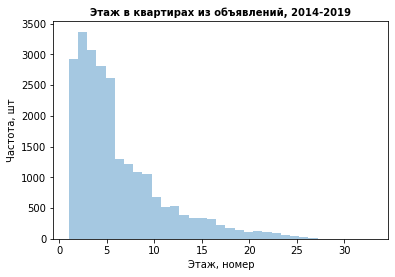

In [47]:
#график для 'floor'
plt.title("Этаж в квартирах из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['floor'], bins=33, kde=False, rug=False, axlabel="Этаж, номер")

Идеальная гистограма и данные. Ничего не делаем с данным столбцом.

#### Столбец 'is_apartment'

Апартаменты (булев тип), только около 3 тыс строк со значениями, пропусков много.
Вероятноэто связано с тем, что большиство квартир - не апартаменты и люди просто ничего не писали в таком случае.


In [48]:
#анализ столбца 'is_apartment'
data['is_apartment'].sort_values().unique()

array([False, True, nan], dtype=object)

In [49]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Вариант апартаментов даже в проставленных значениях очень редкий. Заменим пустые значения на False.

#### Столбец 'studio'

Квартира-студия (булев тип), пропусков нет.


In [50]:
#анализ столбца 'studio'
data['studio'].sort_values().unique()

array([False,  True])

Ничего не делаем со столбцом.

#### Столбец 'open_plan'

Свободная планировка (булев тип), пропусков нет.

In [51]:
#анализ столбца 'open_plan'
data['studio'].sort_values().unique()

array([False,  True])

Ничего не делаем со столбцом.

#### Столбец 'kitchen_area'

Площадь кухни в квадратных метрах (м²), 2278 пропущенных значений.
Сразу сделаем проверку на ошибки в данных.

In [52]:
#анализ столбца 'kitchen_area'
data.query('kitchen_area > total_area')['kitchen_area'].count()

0

Отлично, вылетов нет. Посмотрим на срезу данных с пропусками и нет.

In [53]:
data.query('kitchen_area.isnull()').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,2278.000000,2.278000e+03,2278.000000,2278.000000,940.000000,2231.000000,814.000000,2278.000000,0.0,729.000000,1561.000000,1563.000000,1563.000000,690.000000,1563.000000,844.000000,2075.000000
mean,8.097454,6.518244e+06,56.575680,1.832748,2.860989,11.514567,29.649840,6.205443,NaN,0.868313,28665.817425,13932.816379,0.619322,518.114493,0.798464,515.277251,139.279036
std,5.524265,1.853642e+07,40.863558,1.188674,1.577391,7.123172,24.303926,5.317659,NaN,0.999559,12667.454541,8187.739356,0.819300,377.814908,0.914220,281.879283,189.458259
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,NaN,0.000000,6989.000000,410.000000,0.000000,4.000000,0.000000,16.000000,2.000000
25%,4.000000,2.799250e+06,34.000000,1.000000,2.550000,5.000000,17.050000,2.000000,NaN,0.000000,18732.000000,8523.000000,0.000000,293.500000,0.000000,293.000000,45.000000
50%,7.000000,4.000000e+06,46.000000,2.000000,2.700000,9.000000,20.000000,5.000000,NaN,1.000000,26447.000000,13222.000000,0.000000,462.500000,1.000000,498.000000,60.000000
75%,12.000000,6.200000e+06,64.725000,3.000000,2.800000,17.000000,33.000000,8.000000,NaN,2.000000,37227.000000,16606.500000,1.000000,637.000000,1.000000,719.750000,145.000000
max,21.000000,7.630000e+08,500.000000,9.000000,27.000000,35.000000,250.000000,27.000000,NaN,5.000000,73391.000000,54490.000000,3.000000,2467.000000,3.000000,1293.000000,1489.000000


In [54]:
data.query('kitchen_area.notnull()').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21421.000000,2.142100e+04,21421.000000,21421.000000,13564.000000,21382.000000,20982.000000,21421.000000,21421.000000,11451.000000,16596.000000,16617.000000,16618.000000,7389.000000,16618.000000,8266.000000,18443.000000
mean,10.045749,6.544027e+06,60.749885,2.095934,2.765297,10.586100,34.644380,5.859064,10.569807,1.168020,28805.698060,14215.588795,0.610663,488.254297,0.767601,518.256956,185.570081
std,5.667125,9.726604e+06,35.031758,1.062910,1.235970,6.533802,21.916891,4.835933,5.905438,1.073245,12627.751123,8646.737605,0.800455,338.729048,0.940566,277.308315,222.394288
min,0.000000,1.219000e+04,14.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.500000e+06,40.600000,1.000000,2.510000,5.000000,18.800000,2.000000,7.000000,0.000000,18574.750000,9289.000000,0.000000,287.000000,0.000000,294.000000,45.000000
50%,10.000000,4.700000e+06,52.500000,2.000000,2.650000,9.000000,30.100000,4.000000,9.100000,1.000000,26757.000000,13094.000000,0.000000,453.000000,0.000000,503.000000,102.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.800000,15.000000,42.547500,8.000000,12.000000,2.000000,37275.500000,16270.000000,1.000000,611.000000,1.000000,730.000000,239.000000
max,50.000000,4.200000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Данные похожи между собой, поступим аналогично с данными по жилой площади. Вычислим необходимый коэффициент.

In [55]:
total_area_to_kitchen_area = (
    data.query('kitchen_area.notnull()')['kitchen_area']/data.query('kitchen_area.notnull()')['total_area']
).mean()

total_area_to_kitchen_area

0.18735473877174058

#### Столбец 'balcony'

Число балконов, 11519 пропущенных значений.

In [56]:
#анализ столбца 'balcony'
data['balcony'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

Скорее всего, если человек не указал число балконов — нет. Такие пропуски правильно заменить на 0.

#### Столбец 'locality_name'

Название населённого пункта, 49 пропущенных значений.

In [57]:
#анализ столбца 'locality_name'
len(data['locality_name'].unique())

365

In [58]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Оказывается вариаций населенных пунктов много - 365. У кого-то в названии есть обозначение типа населенного пункта, а у кого-то нет. Нужно попробовать это унифицировать. Также нашлись и дубликаты, где отличается 1 буква в типе населенного пункта:
- 'посёлок Пансионат Зелёный Бор',
- 'поселок Пансионат Зелёный Бор'.

Решим эту проблему в будущем.

In [59]:
data.groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: total_images, dtype: int64

Больше всего квартир продавалось вероятно в Санкт-Петербургe, а дальше значения становятся сильно ниже. Но рейтинг может и измениться после предобработки данных. Для задачи нам потребуется разобраться с ТОП-10 населенных пунктов. Пока просто посмотрим на них, и вернемся при изучении. Пропусков не так много, пока не будем их заполнять. 

#### Столбцы 'airports_nearest', 'cityCenters_nearest', 'parks_around3000 ', 'ponds_around3000'.

Следующие столбцы изцчим вместе: 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000'. У них похожее число пропущенных значений: 5542, 5519, 5518, 5518 соответсвенно. Эти данные заполнялись компьютером. Возможно алгоритм не отработал на них похожим образом.

Сбой мог произойти из-за отсутсвия координат в данном массиве квартир.

In [60]:
data.query(
    'airports_nearest.isnull() and cityCenters_nearest.isnull() and parks_around3000.isnull() and ponds_around3000.isnull()'
)['total_images'].count()

5518

Бинго, видим, что если есть пропуски в 'parks_around3000', 'ponds_around3000', то они есть и в 'airports_nearest', 'cityCenters_nearest'. 

Только 1 строка есть с пропуском 'cityCenters_nearest', но без пропусков в 'parks_around3000', 'ponds_around3000'. Посмотри на нее позже. И 24 строки с пропусками 'airports_nearest' но без пропусков в других.

Но для начала поймем природу таких пропусков. Посмотрим на населенные пункты с пропусками.

In [61]:
data.query(
    'airports_nearest.isnull() and cityCenters_nearest.isnull() and parks_around3000.isnull() and ponds_around3000.isnull()'
).groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10)

locality_name
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: total_images, dtype: int64

Интересно, что тут в лидерах нет Санкт-Петербурга. Возможно данные, заполненные компьютером есть только для для ряда городов, включая, к примеру, Санкт-Петербург. Но не включая, к примеру, Выборг (237 значений всего и все с пропусками по расстояниям).

In [62]:
data.query(
    'ponds_around3000.notnull()'
).groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      15660
посёлок Шушары         436
Пушкин                 369
Колпино                337
посёлок Парголово      327
Петергоф               201
Сестрорецк             183
Красное Село           176
Ломоносов              132
Кронштадт               95
Name: total_images, dtype: int64

61 строка не заполнилась по СПБ, наверное по части входных данных не хватило данных для алгоритма. Но в большстве случаев данных не хватало по маленьким городам. Эти данные сложно воспроизвести и заполнить, раз даже у алгоритма это не вышло по входным данным. Мы не будем заполнять эти пропуски.

Перед тем как перейти к следующим столбцам посмотрим еще на несколько строк.

In [63]:
data.query(
    'cityCenters_nearest.isnull() and ponds_around3000.notnull()'
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20190,2,10500000.0,85.0,2019-01-08T00:00:00,3,3.0,3.0,55.5,2,NaN,...,8.0,1.0,Пушкин,15527.0,NaN,1.0,134.0,0.0,NaN,NaN


Расстояние до центра не удалось определить до центра города Пушкин. Скорее всего у алгоритма не было координат именно центра этого населенного пункта. Не трогаем этот пропуск.

In [64]:
data.query(
    'airports_nearest.isnull() and ponds_around3000.notnull()'
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
733,18,18700000.0,109.7,2018-02-03T00:00:00,3,2.75,21.0,57.2,13,NaN,...,15.3,1.0,Санкт-Петербург,NaN,13355.0,1.0,735.0,0.0,NaN,112.0
974,8,25897000.0,149.0,2018-03-26T00:00:00,4,2.74,7.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,9734.0,2.0,469.0,3.0,263.0,90.0
2415,17,9500000.0,67.4,2017-04-15T00:00:00,2,2.80,23.0,37.6,4,NaN,...,12.0,0.0,Санкт-Петербург,NaN,13355.0,1.0,735.0,0.0,NaN,56.0
7521,16,43500000.0,245.8,2015-12-17T00:00:00,3,4.45,7.0,170.8,7,True,...,25.0,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1067.0
7542,10,6900000.0,50.0,2016-03-17T00:00:00,1,2.80,23.0,20.0,12,NaN,...,10.0,0.0,Санкт-Петербург,NaN,13355.0,1.0,735.0,0.0,NaN,317.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
8628,0,8000000.0,48.9,2018-02-23T00:00:00,1,NaN,6.0,NaN,4,NaN,...,NaN,NaN,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,60.0
9054,5,13000000.0,71.8,2017-09-12T00:00:00,2,2.75,10.0,32.5,5,NaN,...,18.9,2.0,Санкт-Петербург,NaN,9734.0,2.0,469.0,3.0,263.0,156.0
9880,11,5300000.0,51.0,2018-01-10T00:00:00,2,NaN,5.0,22.6,4,NaN,...,15.8,NaN,Санкт-Петербург,NaN,4892.0,0.0,NaN,2.0,369.0,13.0
10669,9,3400000.0,46.0,2018-09-01T00:00:00,2,2.60,5.0,28.0,5,NaN,...,6.7,NaN,Санкт-Петербург,NaN,21377.0,0.0,NaN,0.0,NaN,106.0


Природа данной ошибки не совсем понятна, так как видно, что координаты квартир были для расчета других растояний. Координаты аэропорта тоже были, как видно по строке из блока выше выше. Тем неменеее это всего 23 строки. Не будем заполнять по ним пропуски.

#### Столбцы 'parks_nearest' и 'ponds_nearest'

На эти 2 столбца тоже посмотрим вместе. Если смотреть на блок выше, то возникает гипотеза, что пропуски в этих столбцах есть или когда есть пропуски и в других строках с пропусками от работающего алгоритма. Или когда число парков или водоемов = 0.

Проверим это.

In [65]:
data.query(
    'parks_nearest.isnull()'
)['parks_around3000'].unique()

array([ 0., nan])

In [66]:
data.query(
    'ponds_nearest.isnull()'
)['ponds_around3000'].unique()

array([ 0., nan])

Бинго, эти пропуски не случайны. Не меняем ничего в данных столбцах.

#### Столбец 'days_exposition'

Сколько дней было размещено, 3181 пропущенных значений. В теории данные пропуски связаны с датой размещения, возмжны мы сможем вычислить время продажи их даты.

In [67]:
#анализ столбца 'days_exposition'
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

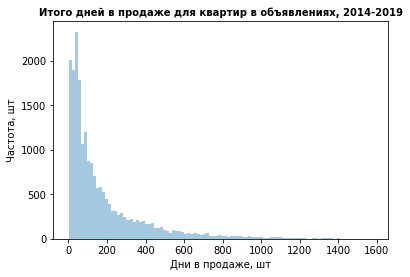

In [68]:
#график для 'days_exposition'
plt.title("Итого дней в продаже для квартир в объявлениях, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['days_exposition'], bins=100, kde=False, rug=False, axlabel="Дни в продаже, шт")

Данные похожи на распределение Пуассона. Это хорошо, теперь сравним данные с пропусками и нет.

In [69]:
data.query(
    'days_exposition.isnull()'
).describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,3181.000000,3.181000e+03,3181.000000,3181.000000,2453.000000,3172.000000,2983.000000,3181.000000,2978.000000,1071.000000,2314.000000,2315.000000,2316.000000,1145.000000,2316.000000,1216.000000,0.0
mean,11.454888,8.317773e+06,69.880849,2.367809,2.819124,9.469105,40.258284,5.281044,11.393889,1.745098,28474.184097,13494.387905,0.685233,489.085590,0.833333,503.824836,NaN
std,5.571174,1.087618e+07,43.314378,1.177310,1.246635,6.094649,25.328832,4.440832,7.077621,1.044528,12096.804752,8908.430293,0.827063,322.301475,0.977869,281.721679,NaN
min,0.000000,4.300000e+05,20.600000,0.000000,2.000000,1.000000,8.000000,1.000000,1.300000,1.000000,6989.000000,181.000000,0.000000,13.000000,0.000000,13.000000,NaN
25%,7.000000,3.800000e+06,44.000000,2.000000,2.500000,5.000000,24.500000,2.000000,7.200000,1.000000,18986.000000,7310.000000,0.000000,301.000000,0.000000,263.000000,NaN
50%,11.000000,5.600000e+06,59.600000,2.000000,2.680000,8.000000,35.000000,4.000000,9.450000,1.000000,26369.500000,12445.000000,0.000000,463.000000,1.000000,481.500000,NaN
75%,16.000000,9.000000e+06,80.000000,3.000000,2.900000,12.000000,48.000000,7.000000,12.800000,2.000000,36537.500000,15900.500000,1.000000,603.000000,1.000000,723.750000,NaN
max,20.000000,2.892384e+08,631.200000,11.000000,32.000000,36.000000,332.000000,30.000000,87.200000,5.000000,84853.000000,65952.000000,3.000000,2880.000000,3.000000,1271.000000,NaN


In [70]:
data.query(
    'days_exposition.notnull()'
).describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20518.000000,2.051800e+04,20518.000000,20518.000000,12051.000000,20441.000000,18813.000000,20518.000000,18443.000000,11109.000000,15843.000000,15865.000000,15865.000000,6934.000000,15865.000000,7894.000000,20518.000000
mean,9.610976,6.266173e+06,58.870830,2.024564,2.761805,10.860770,33.538133,5.987133,10.436742,1.092718,28840.336047,14292.967097,0.600630,491.088405,0.761046,520.161515,180.888634
std,5.659554,1.086298e+07,34.077046,1.054808,1.263803,6.652375,21.317216,4.943915,5.682611,1.056323,12706.704083,8559.271776,0.797816,345.533073,0.932111,277.052957,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,39.500000,1.000000,2.520000,5.000000,18.300000,2.000000,7.000000,0.000000,18500.000000,9479.000000,0.000000,287.000000,0.000000,301.000000,45.000000
50%,9.000000,4.500000e+06,50.900000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26768.000000,13166.000000,0.000000,451.000000,0.000000,504.000000,95.000000
75%,14.000000,6.500000e+06,67.900000,3.000000,2.800000,16.000000,41.600000,8.000000,11.950000,2.000000,37407.000000,16386.000000,1.000000,613.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видим, что такие квартиры с пропусками по времени продажи чуть дороже и больше. Но пока не ясно в чем их уникальность. Посмотрим на связь с датой, возможно произошли сбои в конкретные даты.

In [71]:
len(list(set(
    data.query('days_exposition.isnull()')['first_day_exposition'].unique()
)&set(
    data.query('days_exposition.notnull()')['first_day_exposition'].unique()
)
    ))

689

Сбоев в конкретные даты не было, видно, что пересечение списков не пусто. Вернемся к этому столбцу после обработки стобца с датой.

### Вывод

Итого, изучив все столбцы и пропуски мы пришли к следующему плану действий:
- <b>total_images:</b> пропусков нет, ничего не делаем.
- <b>last_price:</b> ключевой столбец, попусков нет, есть длинный хвост с аномально большими значениями, требующими аккуратного подхода к обработке. Вернемся к данному столбцу с следующих шагах.
- <b>total_area:</b> пропусков нет, распреление похоже на last_price, скорее всего выделится класс элитных больших и дорогих квартир для нашей модели, в котором ценообразование будет работать особым образом.
- <b>first_day_exposition:</b> пропусков нет, необходимо изменить тип данных на дату.
- <b>rooms:</b> пропусков нет, но есть значение 0, которое очень похоже на значение 1. Вероятно валдельцы не стали указывать число комнат, так как комната была всего одна.
- <b>ceiling_height:</b> пропуски, а также ошибки (высота больше 10 метров и меньше 2.1) заменим на медиану по срезу 'ceiling_height >= 2.1 and ceiling_height < 4'.
- <b>floors_total:</b> пропусков всего 86, и они не выглядят случайными - не будем их заполнять.
- <b>living_area:</b> заполним пропуски, используя коэффициент total_area_to_living_area.
- <b>floor:</b> ничего не делаем с данным столбцом.
- <b>is_apartment:</b> заменим пустые значения на False.
- <b>studio:</b> ничего не делаем со столбом.
- <b>open_plan:</b> ничего не делаем со столбом.
- <b>kitchen_area:</b> заполним пропуски, используя коэффициент total_area_to_kitchen_area.
- <b>balcony:</b> пропуски заменим на 0.
- <b>locality_name:</b> нужно удалить названия типов населенных пунктов.
- <b>airports_nearest:</b> пока ничего не меняем.
- <b>cityCenters_nearest:</b> пока ничего не меняем.
- <b>parks_around3000:</b> пока ничего не меняем.
- <b>parks_nearest:</b> пока ничего не меняем.
- <b>ponds_around3000:</b> пока ничего не меняем.
- <b>ponds_nearest:</b> пока ничего не меняем.
- <b>days_exposition:</b> пока ничего не меняем.

В целом, мы меняем часть данных, которые заполнялись людьми. Так как часть их них действительно носят случайный характер. В отличие от данных, заполненных компьютером. По пропускам видно, что для работы алгоритма не хватало данных, поэтому пропуски не слуайны и их трудно заполнить корректно. Поэтому их пока не трогаем.

### Шаг 2. Предобработка данных

#### Предобработка данных, столбец 'first_day_exposition'

Начнем с первого столбца, который нам нужно изменить: first_day_exposition. Вспомним пример текущего формта даты.

In [72]:
data['first_day_exposition'].head(1)

0    2019-03-07T00:00:00
Name: first_day_exposition, dtype: object

In [73]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [74]:
data['first_day_exposition'].head(1)

0   2019-03-07
Name: first_day_exposition, dtype: datetime64[ns]

Замена прошла успешно!

#### Предобработка данных, столбец 'rooms'

Заменим значение 0 на 1, как решили выше.

In [75]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [76]:
data['rooms'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

Замена прошла успешно.

#### Предобработка данных, столбец 'ceiling_height'

Пропуски, а также ошибки (высота больше 10 метров и меньше 2.1) заменим на медиану по срезу 'ceiling_height >= 2.1 and ceiling_height < 4'. Для начала найдем эту медиану.

In [77]:
median_height = data.query('ceiling_height >= 2.1 and ceiling_height < 4')['ceiling_height'].sort_values().median()
median_height

2.65

In [78]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = median_height
data.loc[data['ceiling_height'] < 2.1, 'ceiling_height'] = median_height
data.loc[data['ceiling_height'].isnull(), 'ceiling_height'] = median_height

In [79]:
data['ceiling_height'].sort_values().unique()

array([2.2 , 2.25, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 ,
       2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61,
       2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72,
       2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83,
       2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94,
       2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05,
       3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16,
       3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28,
       3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39,
       3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51,
       3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63,
       3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82,
       3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  ,
       4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.25, 4.

Пропусков и вылетов больше не осталось.

#### Предобработка данных, столбцы 'living_area' и 'kitchen_area'

Заполним пропуски, используя коэффициент total_area_to_living_area. мы его уже определили, вызовем для проверки. И после заменим пропуски.

In [80]:
total_area_to_living_area

0.5647655216993234

In [81]:
data.loc[data['living_area'].isnull(), 'living_area'] = data['total_area']*total_area_to_living_area

In [82]:
data[data['living_area'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Замена прошла успешно. Больше не осталось пропусков. Аналогично для 'kitchen_area'

In [83]:
total_area_to_kitchen_area

0.18735473877174058

In [84]:
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data['total_area']*total_area_to_kitchen_area

In [85]:
data[data['kitchen_area'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition



#### Предобработка данных, столбец 'is_apartment'

Заменяем пустые значения на False.

In [86]:
data.loc[data['is_apartment'].isnull(), 'is_apartment'] = False

In [87]:
data['is_apartment'].unique()

array([False,  True])

Замена прошла успешно.

#### Предобработка данных, столбец 'balcony'

Заменяем пропуски на 0.

In [88]:
data.loc[data['balcony'].isnull(), 'balcony'] = 0

In [89]:
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

Успех с заменой, больше пропусков нет.

#### Предобработка данных, столбец 'locality_name'

Вспомним, сколько разных значений было в этом столбце.

In [90]:
len(data['locality_name'].unique())

365

Теперь займемся обработкой.

In [91]:
data['locality_name'] = data['locality_name'].astype('category')
def filter_words(text):
    text2 = text
    for word in text.split():
         if word == word.lower():
                text2 = text2.replace(word, "")
                text2 = ' '.join(text2.split())
    return text2

data['locality_name'] =  data['locality_name'].apply(filter_words)

In [92]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [93]:
len(data['locality_name'].unique())

306

Отлично! Сократили почти на 60 число уникальных значений.

####  Замена типов данных.

Сначала посмотрим сколько занимает текущий датасет.

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

До изменения данных память, которую занимают данные - 3.5+ MB.

Все текстовые значения имеют фомат - object. Пока их не будем трогать. Займемся числовыми.

In [95]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.078948,2.698113,10.673824,34.562480,5.892358,10.572683,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.066196,0.231287,6.597173,22.326965,4.885249,6.095394,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,1.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.080000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,8.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Посмотрев на минимальные и максимальные значения, можно определить следующий новый тип для наших столбцов:

- total_images: тут хватит int8
- last_price: тут хватит float32
- total_area: float32
- rooms: int8
- ceiling_height: float16
- floors_total: int8
- living_area: float32
- floor: int8
- kitchen_area: float32
- balcony: int8
- airports_nearest: int32
- cityCenters_nearest: int32
- parks_around3000: int8
- parks_nearest: int16
- ponds_around3000: int8
- ponds_nearest: int16
- days_exposition: int16

In [96]:
data['total_images'] = np.int8(data['total_images'])
data['last_price'] = np.float32(data['last_price'])
data['total_area'] = np.float32(data['total_area'])
data['rooms'] = np.int8(data['rooms'])
data['ceiling_height'] = np.float32(data['ceiling_height'])
#data['floors_total'] = np.int8(data['floors_total'])
data['living_area'] = np.float32(data['living_area'])
data['floor'] = np.int8(data['floor'])
data['kitchen_area'] = np.float32(data['kitchen_area'])
data['balcony'] = np.int8(data['balcony'])
#data['airports_nearest'] = np.int32(data['airports_nearest'])
#data['cityCenters_nearest'] = np.int32(data['cityCenters_nearest'])
#data['parks_around3000'] = np.int8(data['parks_around3000'])
#data['parks_nearest'] = np.int16(data['parks_nearest'])
#data['ponds_around3000'] = np.int8(data['ponds_around3000'])
#data['ponds_nearest'] = np.int16(data['ponds_nearest'])
#data['days_exposition'] = np.int16(data['days_exposition'])

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int8
last_price              23699 non-null float32
total_area              23699 non-null float32
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int8
ceiling_height          23699 non-null float32
floors_total            23613 non-null float64
living_area             23699 non-null float32
floor                   23699 non-null int8
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float32
balcony                 23699 non-null int8
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around30

In [98]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,23699.0,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6541548.5,60.348648,2.078948,2.698112,10.673824,34.562477,5.892358,10.572682,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,10887013.0,35.654083,1.066196,0.231287,6.597173,22.326965,4.885249,6.095394,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,12190.0,12.000000,1.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400000.0,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4650000.0,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.080000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6800000.0,69.900002,3.000000,2.700000,16.000000,42.099998,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,763000000.0,900.000000,19.000000,8.300000,60.000000,409.700012,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Мы сократили объем данных на 1 MB. Также проверили, вызвав снова метод describe(), не за терли ли мы что-то случайно. Теперь оптимизируем столбец object. К сожалению, по столбцам, где мы оставляем пропуски оптимизация данных на более легкий или вещественный тип их затирает, поэтому их пока не трогаем.

In [99]:
data['locality_name'] = data['locality_name'].astype('category')

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int8
last_price              23699 non-null float32
total_area              23699 non-null float32
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int8
ceiling_height          23699 non-null float32
floors_total            23613 non-null float64
living_area             23699 non-null float32
floor                   23699 non-null int8
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float32
balcony                 23699 non-null int8
locality_name           23650 non-null category
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

Срезали еще чуть-чуть памяти. Теперь перейдем непосредственно к анализу данных.

### Шаг 3. Посчитайте и добавьте в таблицу

Добавим цену за квадратный метр.

In [101]:
data['price_per_metr'] = data['last_price'] / data['total_area']

In [102]:
data['price_per_metr'].describe()

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price_per_metr, dtype: float64

In [103]:
data['price_per_metr'] = np.float32(data['price_per_metr'])

Добавили столбец и сразу оптимизировали у него тип данных.

Добавим столбцы: день недели, месяц и год публикации объявления.

In [104]:
data['week_day'] = data['first_day_exposition'].dt.weekday

In [105]:
data['month'] = data['first_day_exposition'].dt.month

In [106]:
data['year'] = data['first_day_exposition'].dt.year

In [107]:
data['week_day'] = np.int8(data['week_day'])
data['month'] = np.int8(data['month'])
data['year'] = np.int16(data['year'])

Добавили и сразу оптимизировали у столбцов тип данных.

Добавим столбцы: этаж квартиры; варианты — первый, последний, другой.

In [108]:
#создаем функцию для категоризации по этажам
def floor_group(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

In [109]:
data['floor_group'] = data.apply(lambda x: floor_group(x['floor'], x['floors_total']), axis=1)
data['floor_group'] = data['floor_group'].astype('category')

Добавили еще 1 столбец, теперь добавляем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [110]:
data['living_area_to_total_area'] = data['living_area'] / data['total_area']
data['kitchen_area_to_total_area'] = data['kitchen_area'] / data['total_area']

data['living_area_to_total_area'] = np.float32(data['living_area_to_total_area'])
data['kitchen_area_to_total_area'] = np.float32(data['kitchen_area_to_total_area'])

Добавим столбцы для задачи про стоимость кв. метра в зависимости от удаленности от центра в км.

In [111]:
data['km_to_centr'] = (data['cityCenters_nearest'] / 1000)

In [112]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_metr,week_day,month,year,floor_group,living_area_to_total_area,kitchen_area_to_total_area,km_to_centr
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,...,755.0,NaN,120370.367188,3,3,2019,другой,0.472222,0.231481,16.028
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,False,...,NaN,81.0,82920.789062,1,12,2018,первый,0.460396,0.272277,18.603
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,False,...,574.0,558.0,92785.710938,3,8,2015,другой,0.612500,0.148214,13.933
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14.0,89.797714,9,False,...,234.0,424.0,408176.093750,4,7,2015,другой,0.564766,0.187355,6.800
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,...,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,8.098


Добавили все необходимые столбцы, поменяли по ним тип данных и посмотрели на них в первых 5 строках. Перед началом финального анализа, давайте еще проверим нашу таблицу на дубликаты.

In [113]:
data.duplicated().sum()

0

Отлично, приступаем к анализу!

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Площадь, цена, число комнат, высота потолков

Cледующие параметры: площадь, цена, число комнат, высота потолков мы уже изучали при исследовании столбцов. Построим гистограммы для каждого параметра. Начнем с цены:

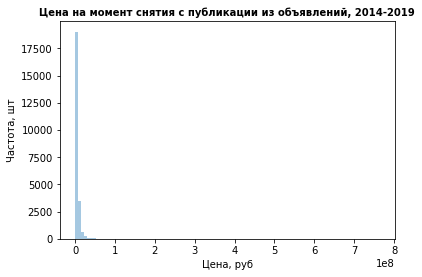

In [114]:
#график для 'last_price'
plt.title("Цена на момент снятия с публикации из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['last_price'], bins=100, kde=False, rug=False, axlabel="Цена, руб")

Видим пик около 0, и хвост, тянущийся до 8 млн, который мешает нам рассмотреть значения около 0. Постоим еще 1 гистрограмму.

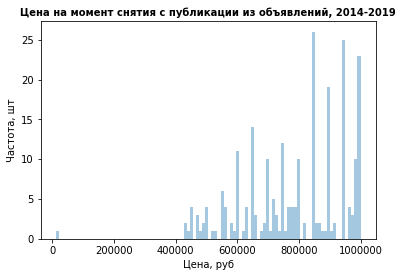

In [115]:
#data['last_price'].hist(bins=100, range=(0,1000000))
#plt.show()
plt.title("Цена на момент снятия с публикации из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data.query('last_price <= 1000000')['last_price'] ,kde=False, bins=100, rug=False, axlabel="Цена, руб")

Да, около 0 есть выброс. Но кажется мы слишком приблизили. Посмотрим чуть отдаленнее.

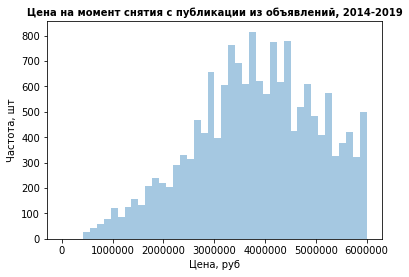

In [116]:
plt.title("Цена на момент снятия с публикации из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data.query('last_price <= 6000000')['last_price'] ,kde=False, rug=False, axlabel="Цена, руб")

Так мы увидили маленькие выбивающиеся значения около 0. А также, что пик проходит в около 4 млн. Будем иметь это ввиду. Посмотрим на другие параметры.

Теперь посмотрим на площадь.

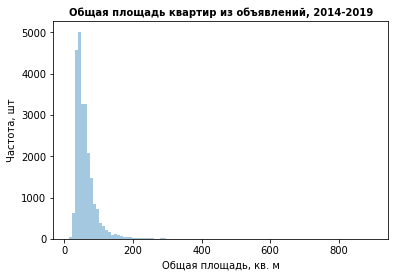

In [117]:
#график для 'total_area'
plt.title("Общая площадь квартир из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['total_area'], bins=100, kde=False, rug=False, axlabel="Общая площадь, кв. м")

Опять есть хвост, помним что максимальное значение было 900. Попробуем посмотреть что творится в начале графика.

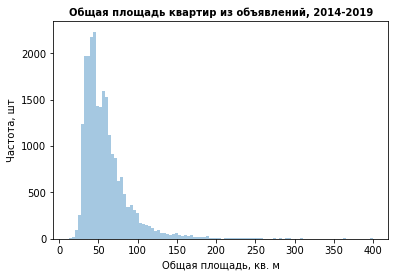

In [118]:
plt.title("Общая площадь квартир из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data.query('total_area <= 400')['total_area'], bins=100, kde=False, rug=False, axlabel="Общая площадь, кв. м")

Интересно, у площади определенно пик определенно около 50 кв. метров. Теперь переходим у числу комнат.

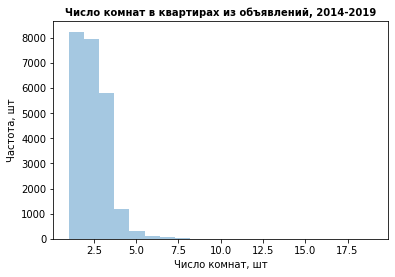

In [119]:
#график для 'rooms'
plt.title("Число комнат в квартирах из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['rooms'], bins=20, kde=False, rug=False, axlabel="Число комнат, шт")

Таже самая история с длинным хвостом. Определенно вырисовывается класс больших и дорогих квартир. 

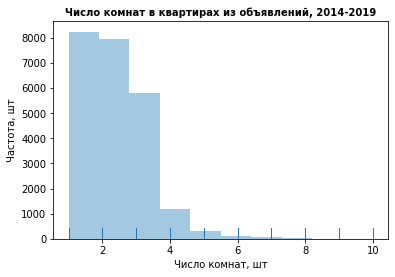

In [120]:
plt.title("Число комнат в квартирах из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data.query('rooms <=10')['rooms'], bins=10, kde=False, rug=True, axlabel="Число комнат, шт")

Определенно продается больше всего однокомнатных квартир.

Проверим что происходит с высотой потолков.

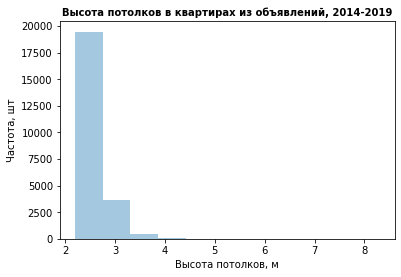

In [121]:
#график для 'ceiling_height'
plt.title("Высота потолков в квартирах из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['ceiling_height'], bins=11, kde=False, rug=False, axlabel="Высота потолков, м")

Высокие потолки - это редкость, посмотрим внимательнее на диапазон от 2.1 до 4, который мы уже определили как эталонный выше.

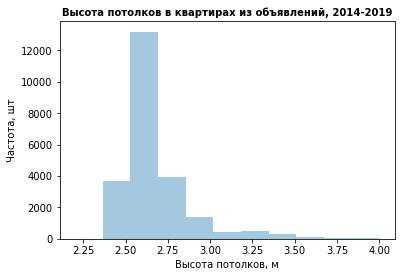

In [122]:
plt.title("Высота потолков в квартирах из объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data.query(
    'ceiling_height >=2.1 and ceiling_height <=4'
)['ceiling_height'], bins=11, kde=False, rug=False, axlabel="Высота потолков, м")

Пик очевидно, около 2,75 метров. Это самое распространенное значение. Выше мы изучили и нашли пики для основных параменров, перейдем к дальнейшему изучению.

#### Время продажи квартиры

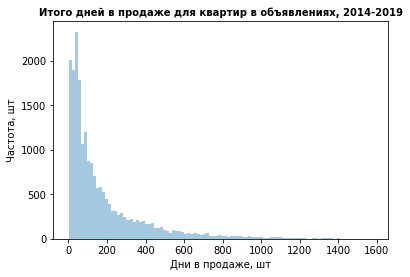

In [123]:
#график для 'days_exposition'
plt.title("Итого дней в продаже для квартир в объявлениях, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data['days_exposition'], bins=100, kde=False, rug=False, axlabel="Дни в продаже, шт")

Некоторые квартиры продавались более 4 лет, но остновной пик около 100. Построим еще 1 гисторамму:

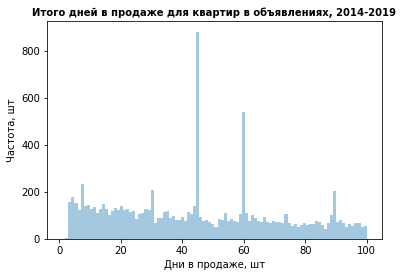

In [124]:
plt.title("Итого дней в продаже для квартир в объявлениях, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data.query('days_exposition <= 100')['days_exposition'], bins=100, kde=False, rug=False, axlabel="Дни в продаже, шт")

Пик между 50 или 100 дней, сравним со средним и медианой.

In [125]:
data['days_exposition'].mean()

180.88863436982163

In [126]:
data['days_exposition'].sort_values().median()

95.0

Медиана намного лучше отражает текущее распределение, чем среднее. посмотрим внимательнее на начения меньше средних.

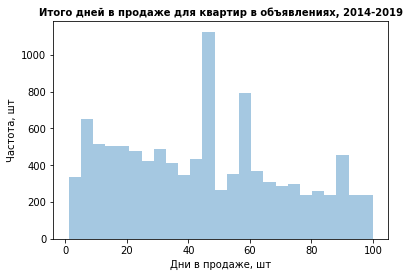

In [127]:
plt.title("Итого дней в продаже для квартир в объявлениях, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=data.query('days_exposition <= 100')['days_exposition'], bins=25, kde=False, rug=False, axlabel="Дни в продаже, шт")

In [128]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим еще 2 пика - около 45 дней и около 60 и небольшой как раз около 90, нашей медианы.

Можно считать, что все, что продается меньше чем за 45 дней - это быстро. А что больше 232 дней (другого квантиля) - долго.

Данные пики кратны 1,5 месяца, 2 месяца и 3 месяца. Это скорее всего не случайно. Скорее всего на сайтах с объявлениями есть напоминания о том, что объявление висит уже месяц, и что или нужно его продлить или обновить. Также часто люди планируют и мыслят отрезками кратным месяцам. Если квартира не продалась за месяц - что-то в объявлении меняется. Часто, это конечно цена. Сначала все ставят цену выше, но если спроса нет - снижают. А дальше после первого снижения, которое все еще осторожное - примерно за 2 недели может найтись покупатель. Если цену снижают второй или третий раз, но у продавца уже больше понимания рынка и цену он уже ставит более вероятную для быстой продажи. Этим объясняется, что пиков в 2,5 месяцев нет.

#### Работа с выбивающими значениями

Есть 2 блока выбивающихся значений. Посмотрим на них. Удалять мы их не будем, ведь при анализе зависмости можно будет смотреть на срез без них.

Первый - это аномальный всплеск очень дешевых квартир (значения меньше 200 тыс);
Второй - это отдельный сегмент догорих и больших квартир. Его нужно смотреть отдельно и понять как правильно определить.

In [129]:
data.query('last_price < 200000').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,week_day,month,year,living_area_to_total_area,kitchen_area_to_total_area,km_to_centr
count,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.00000,1.000
mean,7.0,12190.0,109.0,2.0,2.75,25.0,32.0,25.0,40.5,0.0,...,0.0,NaN,8.0,111.834862,2.0,3.0,2019.0,0.293578,0.37156,9.176
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.0,12190.0,109.0,2.0,2.75,25.0,32.0,25.0,40.5,0.0,...,0.0,NaN,8.0,111.834862,2.0,3.0,2019.0,0.293578,0.37156,9.176
25%,7.0,12190.0,109.0,2.0,2.75,25.0,32.0,25.0,40.5,0.0,...,0.0,NaN,8.0,111.834862,2.0,3.0,2019.0,0.293578,0.37156,9.176
50%,7.0,12190.0,109.0,2.0,2.75,25.0,32.0,25.0,40.5,0.0,...,0.0,NaN,8.0,111.834862,2.0,3.0,2019.0,0.293578,0.37156,9.176
75%,7.0,12190.0,109.0,2.0,2.75,25.0,32.0,25.0,40.5,0.0,...,0.0,NaN,8.0,111.834862,2.0,3.0,2019.0,0.293578,0.37156,9.176
max,7.0,12190.0,109.0,2.0,2.75,25.0,32.0,25.0,40.5,0.0,...,0.0,NaN,8.0,111.834862,2.0,3.0,2019.0,0.293578,0.37156,9.176


In [130]:
data.query('last_price < 200000').T

,8793
total_images,7
last_price,12190
total_area,109
first_day_exposition,2019-03-20 00:00:00
rooms,2
ceiling_height,2.75
floors_total,25
living_area,32
floor,25
is_apartment,False


Это явный вылет и ошибка. Не будем ее учитывать при анализе. Теперь разберемся с дорогими и большими квартирами.

In [131]:
data['last_price'].describe()

count        23699.0
mean       6541548.5
std       10887013.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

Межквартильный размах - 3 млн 400 тыс (Q1 = 6 млн 800 тыс, Q3 = 3 млн 400 тыс, а размах - это их разница) . 

Прибавим к правому квантилю (6 млн 800 тыс) 1,5IQR, получим 11 млн 900 тыс. вот и отбросим все эти значения. Выше этих значений - это отдельный класс квартир, на который работают другие факторы. Итого определим и зафиксируем новый срез данных.

In [132]:
good_data = data.query('last_price > 13000 and last_price <= 11900000')

#### Какие факторы больше всего влияют на стоимость квартиры?

Построим матрицу корреляции для нового среза данных. Чтобы узнать от чего зависит цена.

In [133]:
good_data.corr()['last_price']

total_images                  0.158270
last_price                    1.000000
total_area                    0.698678
rooms                         0.451474
ceiling_height                0.331016
floors_total                  0.185166
living_area                   0.585544
floor                         0.127798
is_apartment                  0.022221
studio                       -0.069486
open_plan                    -0.047451
kitchen_area                  0.506883
balcony                       0.063248
airports_nearest             -0.039706
cityCenters_nearest          -0.345806
parks_around3000              0.118828
parks_nearest                 0.039517
ponds_around3000              0.145625
ponds_nearest                -0.051808
days_exposition               0.084571
price_per_metr                0.608681
week_day                     -0.015274
month                         0.005320
year                         -0.003322
living_area_to_total_area     0.022254
kitchen_area_to_total_are

Наибольшая зависимость цены от числа комнат, площади (общей,  жилой и кухни). Чем они больше, тем и цена больше. А близость к центру ведет себя обратным образом, чем меньше расстояние, тем цена больше. 

Также есть определенная зависимость от высота потолков (0,3). Это можно объяснить тем, что в более новых домах высота становится выше. А квартиры в новых домах чаще стоят дороже. Но у нас нет года постройки, хотя было бы очень интересно посмотреть и на эту зависимость.

#### Этажность

Исследуем наши цены относительно групп этажей. Посмотрим сначала на объем категорий, а потом на соотношение цен.

In [134]:
good_data.pivot_table(index='floor_group', values='last_price', aggfunc='count')

,last_price
floor_group,
другой,15863
первый,2806
последний,2995


In [135]:
good_data.pivot_table(index='floor_group', values=['last_price','price_per_metr'])

,last_price,price_per_metr
floor_group,,
другой,5044223.5,95993.445312
первый,4126972.5,78507.695312
последний,4491402.0,83092.765625


Text(0.5, 0, 'Категория этажей')

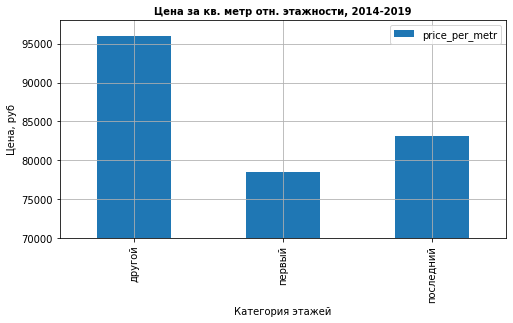

In [136]:
good_data.pivot_table(index='floor_group', values='price_per_metr').plot(
    grid=True, figsize=(8,4), kind='bar', ylim=(70000,98000)
)
plt.title("Цена за кв. метр отн. этажности, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Цена, руб")
plt.xlabel("Категория этажей")

Интересная закономерность, что самые дешевые квартиры находятся на 1 этаже. Потом в рейтинге идет последний этаж, а самые дорогие как раз находятся на друших серединных этажах.

Также квартиры на первом и последнем этажах продаются почти в 5 раз реже, чем на других этажах.

#### День недели
Оценим объем категорий и соотношение цен.

In [137]:
good_data.pivot_table(index='week_day', values='last_price', aggfunc='count')

,last_price
week_day,
0,3299
1,3834
2,3617
3,3875
4,3682
5,1787
6,1570


In [138]:
good_data.pivot_table(index='week_day', values=['last_price','price_per_metr'])

,last_price,price_per_metr
week_day,,
0,4847434.5,91896.601562
1,4905660.5,92530.210938
2,4885391.5,92481.265625
3,4856807.5,91671.765625
4,4826608.5,91969.445312
5,4745465.5,90653.234375
6,4781053.5,91471.351562


Text(0.5, 0, 'День недели')

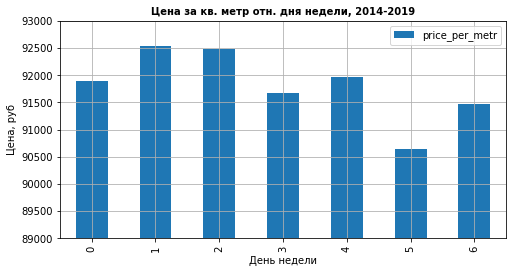

In [139]:
good_data.pivot_table(index='week_day', values='price_per_metr').plot(
    grid=True, figsize=(8,4), kind='bar', ylim=(89000,93000)
)
plt.title("Цена за кв. метр отн. дня недели, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Цена, руб")
plt.xlabel("День недели")

Самые дорогие квартиры чаще размещают по понедельникам. Возможно такое важное дело, как продажа хорошей квартиры - нужно неприменно начинать в понедельник.

Но больше всего объявлений появлется в середине недели (вт-чт), а меньше всего на выходных. Потому что на выходных нужно отдыхать =)

#### Месяц
Оценим объем категорий и соотношение цен.

In [140]:
good_data.pivot_table(index='month', values='last_price', aggfunc='count').T

month,1,2,3,4,5,6,7,8,9,10,11,12
last_price,1357,2417,2368,2182,1163,1619,1544,1601,1804,1959,2153,1497


Text(0.5, 0, 'Месяц')

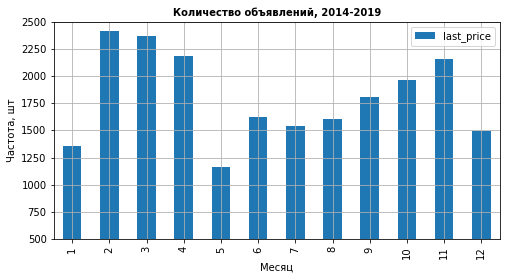

In [141]:
good_data.pivot_table(index='month', values='last_price', aggfunc='count').plot(
    grid=True, figsize=(8,4), kind='bar', ylim=(500,2500)
)
plt.title("Количество объявлений, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
plt.xlabel("Месяц")

Меньше всего квартир продавали в январе и мае. И ведь точно, это же месяцы. где больше всего выходных. Как мы помним, для выходных - это не самое популярное задание. Возможно за счет этого на другие месяцы первого полугодия выпало повышенное предложение.

In [142]:
good_data.pivot_table(index='month', values=['last_price','price_per_metr'])

,last_price,price_per_metr
month,,
1,4801527.0,91764.859375
2,4845414.0,91424.953125
3,4811605.0,92120.414062
4,4953743.5,93589.992188
5,4833370.5,91882.976562
6,4680889.5,89413.789062
7,4855458.0,92012.929688
8,4859378.0,92967.000000
9,4956280.0,92973.640625


Text(0.5, 0, 'Месяц')

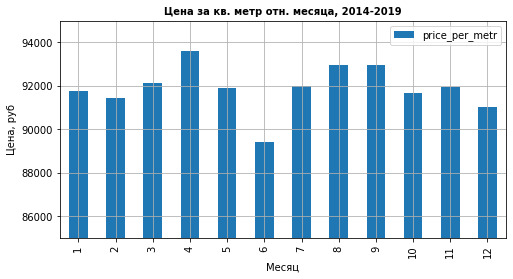

In [143]:
good_data.pivot_table(index='month', values='price_per_metr').plot(
    grid=True, figsize=(8,4), kind='bar', ylim=(85000,95000)
)
plt.title("Цена за кв. метр отн. месяца, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Цена, руб")
plt.xlabel("Месяц")

Цена в сентябре и апреле значительно выше, чем в другие месяцы. Вероятно это связано с тем, что для многих сентябрь (ср. цена за кв. метр - 93 тыс) начало учебы и соответсвенно переезда, а значит там и самый большой спрос. Также заканчивается период отпусков, что тоже влияет на спрос. А в апреле (ср. цена за кв. метр - 93,5 тыс) сезон отпусков еще не начался, что тоже влиет на спрос. Также летом легче осуществить переезд (свободные дороги, более долгий световой день, что важно для ремонта и возможность уехать на дачу или море во время ремонта новой квартиры). А в июне в пору отпусков или начала экзаменов спрос падает (ср. цена за кв. метр - 89 тыс).

#### Год
Оценим объем категорий и соотношение цен.

In [144]:
good_data.pivot_table(index='year', values='last_price', aggfunc='count')

,last_price
year,
2014,89
2015,1016
2016,2522
2017,7502
2018,7921
2019,2614


In [145]:
good_data.pivot_table(index='year', values=['last_price','price_per_metr'])

,last_price,price_per_metr
year,,
2014,5782435.5,94665.140625
2015,5255896.5,90728.109375
2016,4809851.5,89292.695312
2017,4779288.5,90181.187500
2018,4777875.0,92250.960938
2019,5112360.0,99020.328125


Text(0.5, 0, 'Год')

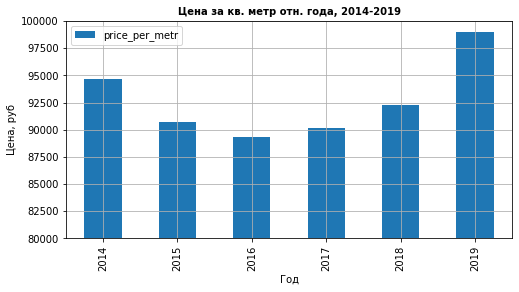

In [146]:
good_data.pivot_table(index='year', values='price_per_metr').plot(
    grid=True, figsize=(8,4), kind='bar', ylim=(80000,100000)
)
plt.title("Цена за кв. метр отн. года, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Цена, руб")
plt.xlabel("Год")

Интересный пик в 2014 году (94 тыс за кв. метр), возможно характеризуемый кризисом и аномальным спросом в конце года. Зато после массового спроса и вкладывания денег в недвижимость в 2014 спрос и цена начали падать (в 2016 89 тыс). И с 2017 опять начался рост. Как результат 2019 год обогнал по цене за кв.м 2014 - 99 тыс за кв. метр).

Но за 2014 год, 2015 и 2019 у нас намного меньше данных. В 2014 и 2019 это вызвано тем, что не все месяцы попали ванализ. А вот 2015 - может быть как и год, в который было мало предложений, так и возможно данные за тот год еще собирались не по всем источникам. Поэтому по аналите по годам лучше пока не делать окончательных выводов, а лучше посмотреть на статистику полного 2019 и 2020.

#### 10 населённых пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

Для это создадим новый срез данных, но для него создам новый список из ТОП10 городов.

In [147]:
top10 = good_data.groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10).reset_index()
top10

,locality_name,total_images
0,Санкт-Петербург,13762
1,Мурино,590
2,Кудрово,470
3,Шушары,440
4,Всеволожск,397
5,Пушкин,339
6,Колпино,336
7,Парголово,327
8,Гатчина,305
9,Выборг,236


In [148]:
top10_data = good_data.query('locality_name in @top10.locality_name').reset_index()
top10_data['locality_name'].unique()

[Шушары, Санкт-Петербург, Парголово, Мурино, Пушкин, Кудрово, Колпино, Гатчина, Выборг, Всеволожск]
Categories (10, object): [Шушары, Санкт-Петербург, Парголово, Мурино, ..., Колпино, Гатчина, Выборг, Всеволожск]

In [149]:
final_table = top10_data.pivot_table(
    index='locality_name', values='price_per_metr', aggfunc=['mean','count'], observed=True
)

final_table.columns = ['price_per_metr','count']

final_table.sort_values(by='count', ascending=False)

,price_per_metr,count
locality_name,,
Санкт-Петербург,105482.578125,13762
Мурино,86087.515625,590
Кудрово,95152.070312,470
Шушары,78677.367188,440
Всеволожск,67214.250000,397
Пушкин,100322.820312,339
Колпино,75185.476562,336
Парголово,90175.914062,327
Гатчина,68421.906250,305


Больше всего объявлений ожидаемов Санкт-Петербурге - 14 тыс. У остальных городов меньше 1 тыс объявлений. После Санкт-Петербурга идет Мурино с 600 объявлениями,и Кудрово с 470. Но цены у этих населенных пунктов не самые высокие. Отфильтруем по цене и посмотрим ниже подробнее на цены.

<div class="alert alert-block alert-warning">
<b>Remarks:</b> не хватает итоговой таблицы с числом объявлений и ценой, отсортированной каким-нибудь образом

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Изменила, добавила чило объявлений к цене.
</div>

In [150]:
final_table.sort_values(by='price_per_metr', ascending=False)

,price_per_metr,count
locality_name,,
Санкт-Петербург,105482.578125,13762
Пушкин,100322.820312,339
Кудрово,95152.070312,470
Парголово,90175.914062,327
Мурино,86087.515625,590
Шушары,78677.367188,440
Колпино,75185.476562,336
Гатчина,68421.906250,305
Всеволожск,67214.250000,397


Text(0.5, 0, 'Населенный пункт')

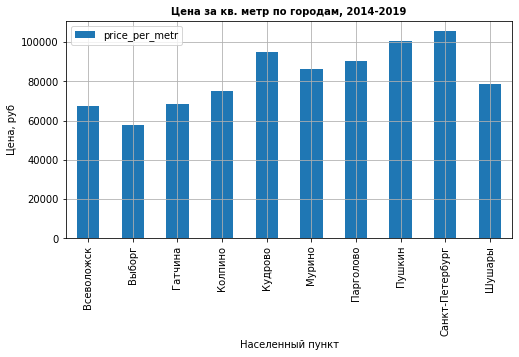

In [151]:
top10_data.pivot_table(index='locality_name', values=['price_per_metr']).plot(grid=True, figsize=(8,4), kind='bar')
plt.title("Цена за кв. метр по городам, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Цена, руб")
plt.xlabel("Населенный пункт")

Самая высокая стоимость жилья за кв. метр ожидаемо в Санкт-Петербурге (105 тыс), а после идут Пушкин (100 тыс) и посёлок Кудрово (95 тыс).

Самая низкая же в Выборге (58 тыс), после него чуть дороже цена за кв. метр в Всеволжске (67 тыс) и Гатчине (68 тыс).

#### Зависимость цены в СПБ от удалённости от центра

Выделим квартиры в Санкт-Петербурге и изучим зависимость цен от удаленности от центра. Задача — выяснить, какая область входит в центр. Мы уже ранее создали столбец с расстоянием до центра в километрах: округленного до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. 

Определим границу, где график сильно меняется — это и будет центральная зона.


In [152]:
spb_data = good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest.notnull()').reset_index()

In [153]:
spb_data['km_to_centr'].describe()

count    13720.000000
mean        12.228465
std          4.581935
min          0.208000
25%          9.713500
50%         12.721500
75%         15.178250
max         29.493000
Name: km_to_centr, dtype: float64

In [154]:
spb_data['km_to_centr'] = spb_data['km_to_centr'].round()

Text(0.5, 0, 'Удаленность от центра, км')

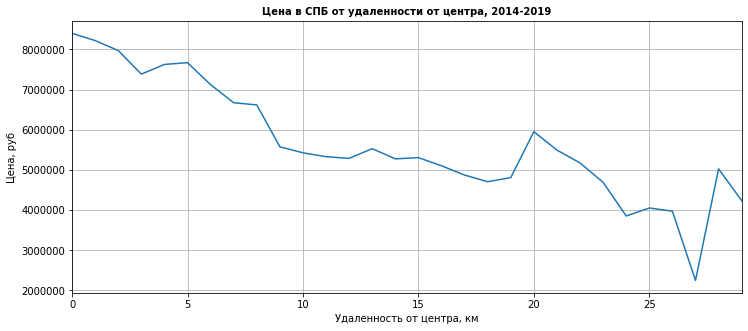

In [155]:
spb_data.groupby('km_to_centr')['last_price'].mean().plot(
    grid=True, figsize=(12,5)
)
plt.title("Цена в СПБ от удаленности от центра, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Цена, руб")
plt.xlabel("Удаленность от центра, км")

Видим 2 падения в 5 и около 8. Но именно после 8 заканчивается резкое падение и начинается некоторая стаблизация. 

Поэтому центр ограничим 8 км.

#### Сегмент квартир в центре

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Отличаются ли они от общих выводов по всему городу?

In [156]:
spb_centr_data = spb_data.query('km_to_centr <=8').reset_index()

In [157]:
spb_centr_data.corr()['last_price']

level_0                      -0.023192
index                        -0.023259
total_images                  0.082632
last_price                    1.000000
total_area                    0.701714
rooms                         0.487286
ceiling_height                0.216919
floors_total                  0.081728
living_area                   0.592660
floor                         0.113999
is_apartment                 -0.029581
studio                       -0.095960
open_plan                    -0.074881
kitchen_area                  0.465803
balcony                       0.065715
airports_nearest             -0.027834
cityCenters_nearest          -0.196035
parks_around3000              0.071466
parks_nearest                 0.049842
ponds_around3000              0.073694
ponds_nearest                -0.003222
days_exposition               0.172239
price_per_metr                0.203503
week_day                      0.012999
month                        -0.013953
year                     

Общая площадь для центра влиет на цену также как и для всех данных (корреляция 0,7).
Число комнат также примерно равнозначно для цены в центре и везде (корреляция 0,48 и 0,45).
Высота потолков уже не так заментнв для центра (корреляция 0,2 и 0,3).
А вот цена за квадратный метр, которая для всех квартир имела хорошую коррляцию с общей ценой (0,6) для от цен центра оказалась не так зависима (0,2). Видимо в принадлежность квартиры к центру снидает внимание к тому, насколько большая площаль у квартиру.
Близость к самой точке центра среди квартир центр чуть менее важна, чем для всех квартир (корреляция для всех -0,35 и для центра -0,19).

In [158]:
spb_centr_data.pivot_table(index='floor_group', values=['last_price','price_per_metr'])

,last_price,price_per_metr
floor_group,,
другой,7511024.0,119792.015625
первый,6232291.5,107988.578125
последний,7365289.5,110776.375000


Text(0.5, 0, 'Категория этажей')

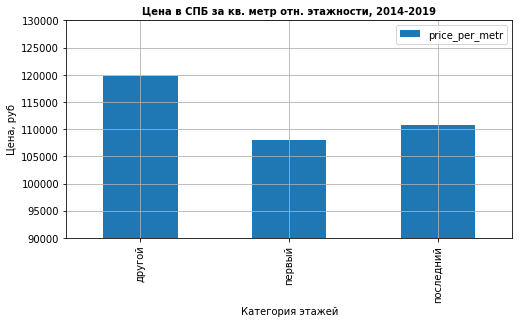

In [159]:
spb_centr_data.pivot_table(index='floor_group', values='price_per_metr').plot(
    grid=True, figsize=(8,4), kind='bar', ylim=(90000,130000)
)
plt.title("Цена в СПБ за кв. метр отн. этажности, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Цена, руб")
plt.xlabel("Категория этажей")

Закономерность между категориеми этажей сохранеятся со всеми даннами.

In [160]:
spb_centr_data.pivot_table(index='week_day', values=['last_price','price_per_metr'])

,last_price,price_per_metr
week_day,,
0,7294379.0,116331.664062
1,7274142.0,115618.289062
2,7350061.5,117701.898438
3,7279140.5,115545.375000
4,7343187.5,115568.640625
5,7228375.5,121426.898438
6,7545965.0,119489.968750


Text(0.5, 0, 'День недели')

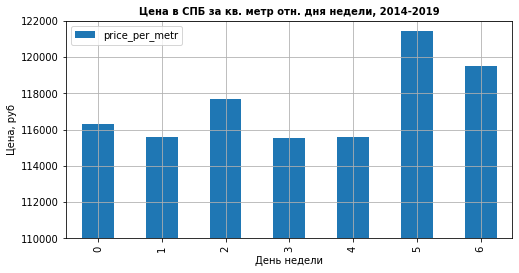

In [161]:
spb_centr_data.pivot_table(index='week_day', values='price_per_metr').plot(
    grid=True, figsize=(8,4), kind='bar', ylim=(110000,122000)
)
plt.title("Цена в СПБ за кв. метр отн. дня недели, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Цена, руб")
plt.xlabel("День недели")

Асоблютно противоположная картина для дня размещения объявлений. Самые дорогие выпускаются по пятницам и суббботам. А в понедельник наоборот минимум.

In [162]:
spb_centr_data.pivot_table(index='month', values=['last_price','price_per_metr'])

,last_price,price_per_metr
month,,
1,7349263.5,117026.515625
2,7366228.5,115192.367188
3,7347628.5,121435.695312
4,7266810.5,118021.578125
5,7429906.5,118315.039062
6,7069269.0,111888.679688
7,7338615.0,117454.187500
8,7280809.5,118097.484375
9,7760115.0,117880.179688


Text(0.5, 0, 'Месяц')

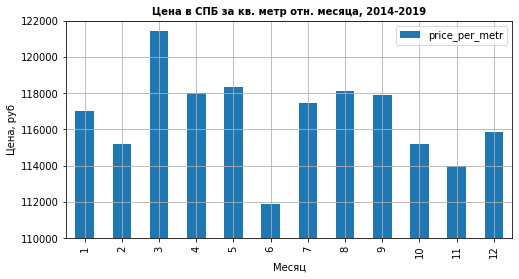

In [163]:
spb_centr_data.pivot_table(index='month', values='price_per_metr').plot(
    grid=True, figsize=(8,4), kind='bar', ylim=(110000,122000)
)
plt.title("Цена в СПБ за кв. метр отн. месяца, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Цена, руб")
plt.xlabel("Месяц")

Для центра пик в марте (121 тыс за кв. метр), а не в апреле как для всех квартир. И нет пика в сетрябре. Зато спады в июне совпадают.

In [164]:
spb_centr_data.pivot_table(index='year', values=['last_price','price_per_metr'])

,last_price,price_per_metr
year,,
2014,7168773.5,112650.765625
2015,7649947.0,111105.601562
2016,7419476.5,112082.976562
2017,7248095.0,114847.390625
2018,7228125.0,119633.929688
2019,7432612.5,124738.906250


Text(0.5, 0, 'Год')

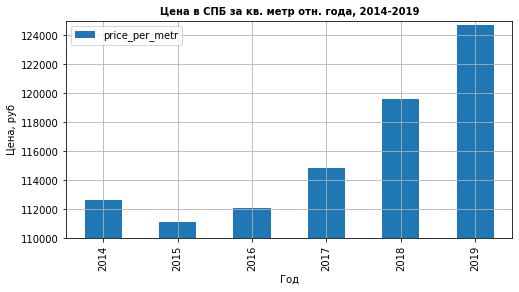

In [165]:
spb_centr_data.pivot_table(index='year', values='price_per_metr').plot(
    grid=True, figsize=(8,4), kind='bar', ylim=(110000,125000)
)
plt.title("Цена в СПБ за кв. метр отн. года, 2014-2019", fontweight='bold', size='medium')
plt.ylabel("Цена, руб")
plt.xlabel("Год")

Для центра тоже заметно падение относительно 2014 года. Но продлилось оно меньше и цена превзошла пик 2014 года раньше, уже в 2017, а не в 2019.

Также конечно бросается в глаза, что средние цены в центре примерно на 25% выше общих.

### Шаг 5. Общий вывод

При работе над этим проектам мы изучили первоначальные данные и подготовили их для дальнейшего анализа. А именно: заполнили пропуски, где это было уместно, изменили тпи данных, категаризовали данные по некоторым столбцам, проверили на дубликаты.

Мы пришли к следующим важным выводам:
- Самая распространненая цена на продающиеся квартиры - около 4 млн, а максимум достиг почти 800 млн.
- Но также присутсвует сегмент больших и дорогих квартир, который существенно отличается от большинства квартир (с ценой более 11 млн 900 тыс).
- Самая распрастраненная площадь, с которой продавались квартиры - около 50 кв. метров, но есть и уникальный максимальный случай в 900 кв. метров
- Число комнат, самое популярное - это 1 комната, а максимум выпал на 19 комнат.
- Средняя и пиковая высота потолков в продаваемых квартирах -  2,75 метров.
- Есть несколько пиков продаж квартир по времени. Около 45 дней, 60 и 90. Квантили - это 45 и 232 дней. То, что продается менее 45 дней - очень быстро. Что дольше 232 дней - долго.
- Есть зависимость цены от числа комнат (коэфициент корреляции 0,45), площади (общей 0,7,  жилой 0,6 и кухни 0,5). Чем они больше, тем и цена больше. А близость к центру ведет себя обратным образом (корреляция -0.35), чем меньше расстояние, тем цена больше. Также есть определенная зависимость от высота потолков (0,3). Это можно объяснить тем, что в более новых домах высота становится выше. А квартиры в новых домах чаще стоят дороже.
- Интересная закономерность, что самые дешевые квартиры находятся на 1 этаже. Потом в рейтинге идет последний этаж, а самые дорогие как раз находятся на друших серединных этажах. Также квартиры на первом и последнем этажах продаются почти в 5 раз реже, чем на других этажах.
- Самые дорогие квартиры чаще размещают по понедельникам. Но больше всего объявлений появлется в середине недели (вт-чт), а меньше всего на выходных.
- Цена в сентябре и апреле значительно выше (ср. цена за кв. метр около 93 тыс), чем в другие месяцы. Это связано с сезоном отпусков и др. сезонными особенностями. А в июне в пору отпусков или начала экзаменов спрос падает (ср. цена за кв. метр - 89 тыс).
- Меньше всего квартир продавали в январе и мае. И ведь точно, это же месяцы, где больше всего выходных. Как мы помним, для выходных - это не самое популярное занятие - выкладывать объявление о продаже. 
- Интересный пик в 2014 году (94 тыс за кв. метр), характеризуемый кризисом и аномальным спросом в конце года. Зато после массового спроса и вкладывания денег в недвижимость в 2014 спрос и цена начали падать (в 2016 89 тыс). И с 2017 опять начался рост. Как результат 2019 год обогнал по цене за кв.м 2014 - 99 тыс за кв. метр). Но за 2014 год, 2015 и 2019 у нас намного меньше данных. Поэтому не нужно считать эти выводы за окончательные.
- Больше всего объявлений ожидаемов Санкт-Петербурге - 14 тыс. У остальных городов меньше 1 тыс объявлений.
- Самая высокая стоимость жилья за кв. метр ожидаемо в Санкт-Петербурге (105 тыс), а после идут Пушкин (100 тыс) и посёлок Кудрово (95 тыс).
- Самая низкая же в Выборге (58 тыс), после него чуть дороже цена за кв. метр в Всеволжске (67 тыс) и Гатчине (68 тыс).
- Район центра в Санкт-Петербурге ограничивается 8 км от центра.

Анализ квартир центра Петербурга.
- Общая площадь для центра влиет на цену также как и для всех данных (корреляция 0,7).
- Число комнат также примерно равнозначно для цены в центре и везде (корреляция 0,48 и 0,45).
- Высота потолков уже не так заментнв для центра (корреляция 0,2 и 0,3).
- А вот цена за квадратный метр, которая для всех квартир имела хорошую коррляцию с общей ценой (0,6) для от цен центра оказалась не так зависима (0,2). 
- Близость к самой точке центра среди квартир центр чуть менее важна, чем для всех квартир (корреляция для всех -0,35 и для центра -0,19).
- Закономерность между категориеми этажей для центра сохранеятся со всеми даннами.
- Асоблютно противоположная картина для дня размещения объявлений. Самые дорогие выпускаются по пятницам и суббботам. А в понедельник наоборот минимум.
- Для центра пик в марте (121 тыс за кв. метр), а не в апреле как для всех квартир. И нет пика в сетрябре. Зато спады в июне совпадают.
- Для центра тоже заметно падение относительно 2014 года. Но продлилось оно меньше и цена превзошла пик 2014 года раньше, уже в 2017, а не в 2019.

Также конечно бросается в глаза, что средние цены ы центре примерно на 25% выше общих.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод